In [1]:
import imp
import rdkit, h5py
from rdkit import Chem
from rdkit.Chem import rdFMCS,AllChem,Draw
from rdkit import DataStructs

import numpy as np
import pandas as pd


In [25]:
def get_sim(mol, sub_mol) -> float: 
    try:
        res = rdFMCS.FindMCS([mol, sub_mol], timeout=1)
        if res.smartsString == "" or res.canceled:
            return 0
        mcs_mol = Chem.MolFromSmarts(res.smartsString)
        Chem.SanitizeMol(mcs_mol)

        mcs_mol_fp = AllChem.GetMorganFingerprintAsBitVect(mcs_mol, 2, nBits=2048)
        sub_mol_fp = AllChem.GetMorganFingerprintAsBitVect(sub_mol, 2, nBits=2048)
        sim = DataStructs.FingerprintSimilarity(sub_mol_fp, mcs_mol_fp)

        
    except Exception as e:
        print("...Exception Occurred at {:1}:".format(Chem.MolToSmiles(mol)))
        print(e)
        return 0
    
    print("original_mol:")
    display(Draw.MolToImage(mol))
    print("sub_mol:")
    display(Draw.MolToImage(sub_mol))
    print("mcs_mol:")
    display(Draw.MolToImage(mcs_mol))

    return sim

In [ ]:
sub_mol = Chem.MolFromSmiles("C1C(C2(=O))C(=O)C=CC2CC1")
mol = Chem.Mol(binmols[92435])
print(get_sim(mol, sub_mol))
Draw.MolToImage(sub_mol)

In [ ]:
sub_mol = Chem.MolFromSmiles("O=C(OC)C1=CC(C2=O)CCCC2C1=O")
#sub_mol = Chem.MolFromSmiles("C1C(C2(=O))C(=O)C=CC2CC1")
Draw.MolToImage(sub_mol)
#mol = Chem.MolFromSmiles("CC1(C)C(CCC2(C)C1CCC(C34C)(C)C2CC(C)(C4=O)C(C)=C(C(OC)=O)C3=O)=O")
mol = Chem.Mol(binmols[92435])
print(get_sim(mol, sub_mol))


In [3]:
#Load HDF5 file
#dataset_filename = r"C:\Users\Leave\OneDrive - hust.edu.cn\大创\pcko1-Deep-Drug-Coder-d6e7ef3\datasets\CHEMBL25_TRAIN_MOLS.h5"
dataset_filename = r"../datasets/CHEMBL25_FILTERED_1.h5"
with h5py.File(dataset_filename, "r") as f:
    binmols = np.asarray(f["mols"])
    idxs = np.asarray(f["idxs"])
    sims = np.asarray(f["sims"])


In [4]:
smiles_data = []
for idx, binmol in enumerate(binmols):
    mol = Chem.Mol(binmol)
    smiles = Chem.MolToSmiles(mol)
    smiles_data.append(smiles)
smiles_data = np.asarray(smiles_data)

#sims = [eval(sim) for idx, sim in enumerate(sims)]

data = np.asarray([idxs, smiles_data, sims]).T


In [8]:
pd_data = pd.DataFrame(data, columns=["index", "smiles", "sub_similarity"], copy=True)
#len(pd_data.loc[[eval(i)<0.3 for i in pd_data["sub_similarity"]]])


60


Bad key "text.kerning_factor" on line 4 in
d:\Anaconda\Anaconda3\envs\ddc_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


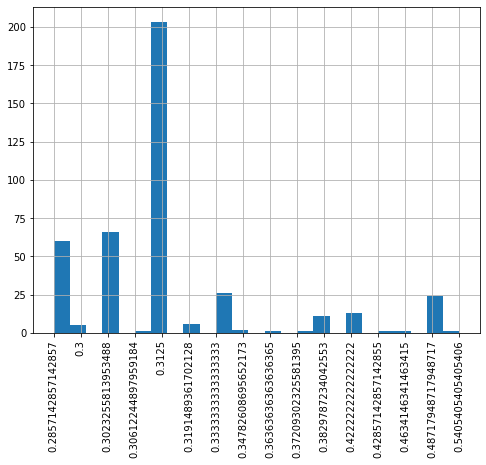

In [6]:
# 绘制样品分布
pd_data["sub_similarity"].sort_values().hist(bins=25, figsize=(8, 6), xrot=90)


In [7]:
pd_data.sort_values("sub_similarity").tail(20)

,index,smiles,sub_similarity
404,1286116,COC1=C(C(=O)c2ccccc2)C(=O)C2(CC=C(C)C)C(=O)C1(...,0.48717948717948717
98,319962,CC(C)=CCC1CC2(CC=C(C)C)C=C(C(=O)c3ccccc3)C(=O)...,0.48717948717948717
401,1271154,COC1=C(C(=O)c2ccccc2)C(=O)C2(CC=C(C)C)CC(C(=O)...,0.48717948717948717
247,810236,COC1=C(C(=O)c2ccccc2)C(=O)C2(CC=C(C)C)CC(CC=C(...,0.48717948717948717
209,665414,CC(C)=CCCC(C)=CCC1CC23CC(O)C(C)(C)OC2=C(C(=O)c...,0.48717948717948717
206,645407,COC(=O)C1CC2(CC=C(C)C)C(=O)C(CC=C(C)C)(C(=O)C(...,0.48717948717948717
201,628723,CC=C(C)CC1CC23CC(CC=C(C)C)C(C)(C)C(CC=C(C)C)(C...,0.48717948717948717
199,620711,CC(C)=CCC1CC23CC(C(C)(C)O)OC2=C(C(=O)c2ccccc2)...,0.48717948717948717
344,1085626,COC1=C(C(=O)c2ccccc2)C(=O)C2(CC=C(C)C)CC(C(=O)...,0.48717948717948717
185,598281,CC(C)=CCCC(C)=CCC1CC23CC(C(C)(C)O)OC2=C(C(=O)c...,0.48717948717948717


In [9]:
len(pd_data)

422